## 大数定律与中心极限定理的仿真实验 
## 概率论与数理统计 | 葛旸

#### 【说明】
#### 本作业要求你通过数值模拟，观察验证：
#### 1. 大数定律（LLN）：样本均值依概率收敛于期望；
#### 2. 中心极限定理（CLT）：标准化样本均值近似服从正态分布。
#### 请在每个“# TODO:”处填写你的代码，并在最后回答分析问题。
#### 不要删除或修改已有注释和结构。

### 第一部分：导入必要库（不要修改）

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置绘图样式（不要修改）
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
sns.set_style("whitegrid")

### 第二部分：大数定律（LLN）
### 任务：模拟 Bernoulli(p) 分布，观察样本均值随 n 增大的收敛行为

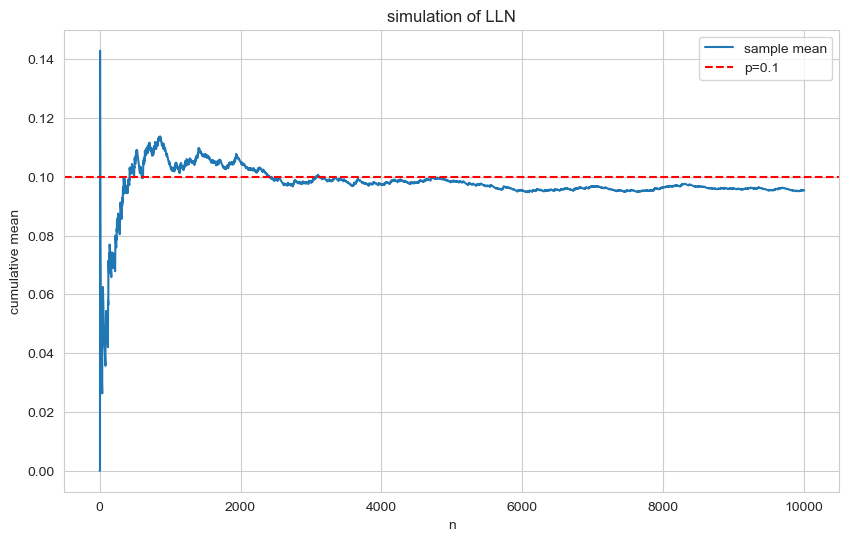

In [2]:
# 参数设置（不要修改）
p = 0.1                # 成功概率
n_max = 10000          # 最大样本量
np.random.seed(123)     # 固定随机种子，保证结果可复现

# TODO: 生成长度为 n_max 的 Bernoulli(p) 随机序列
# 提示：使用 np.random.binomial(1, p, size=n_max)
sample_sequence = np.random.binomial(1, p, size=n_max)

# TODO: 计算前 n 项的累积均值（n 从 1 到 n_max）
# 提示：使用 np.cumsum() 和除法
cumulative_means = np.cumsum(sample_sequence) / np.arange(1, n_max + 1)

# TODO: 绘制累积均值 vs 样本量 n 的曲线
# 要求：
#   - x 轴：样本量 n（1 到 n_max）
#   - y 轴：累积均值
#   - 添加水平线 y = p（理论期望）
#   - 添加标题和坐标轴标签
plt.figure(figsize=(10, 6))
plt.plot(cumulative_means, label='sample mean')
plt.axhline(y=p, color='red', linestyle='--', label=f'p={p}')
plt.xlabel('n')
plt.ylabel('cumulative mean')
plt.title('simulation of LLN')
plt.legend()
# ← 请在此处填写绘图代码
plt.show()

### 第三部分：中心极限定理（CLT）
### 任务：从非正态分布抽样，观察标准化样本均值的分布

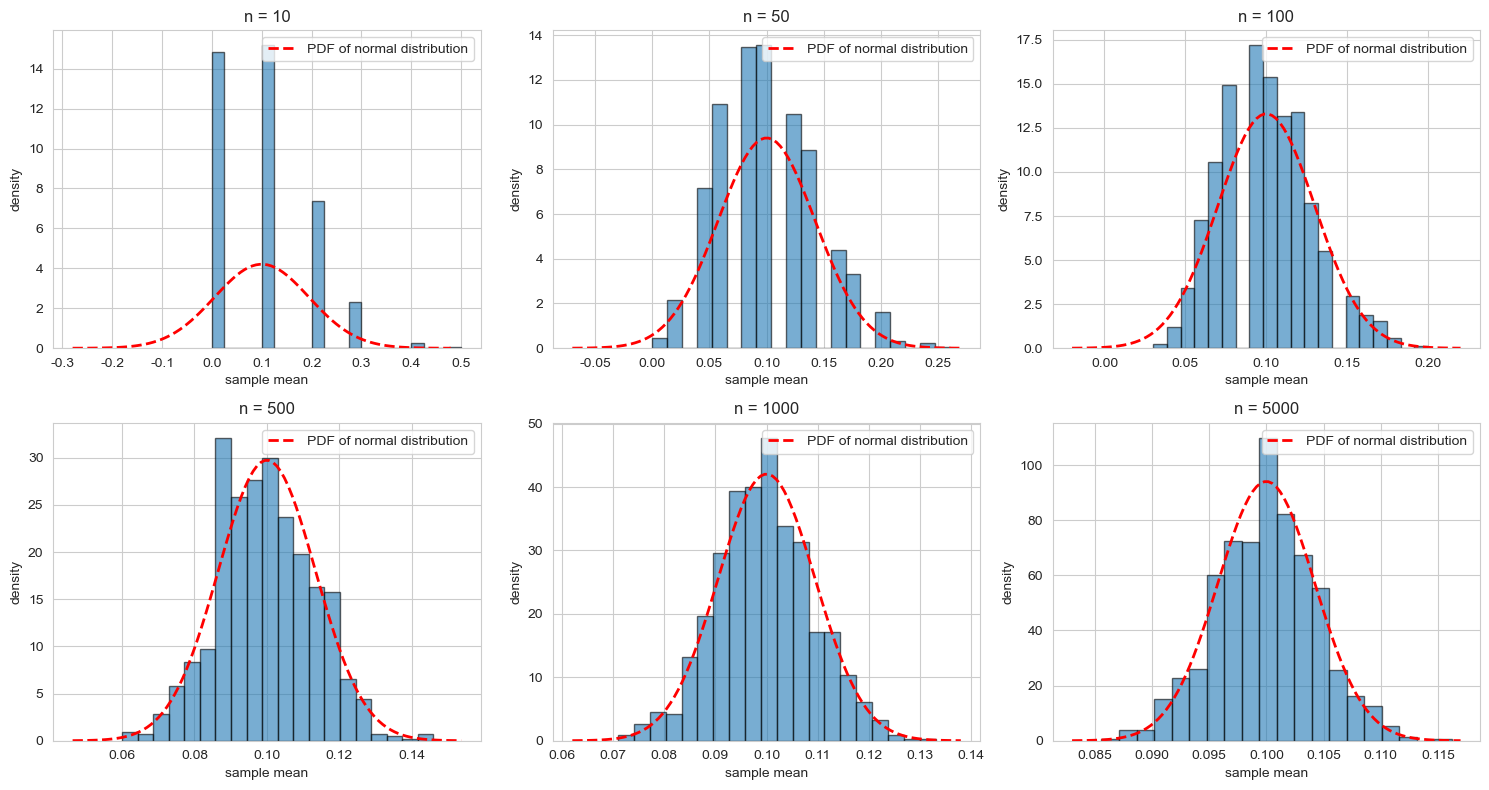

In [3]:
# 参数设置（不要修改）
sample_sizes = [10, 50, 100, 500, 1000, 5000]  # 不同样本量
repetitions = 1000                  # 重复实验次数
np.random.seed(123)

# TODO: 对每个 sample_size，进行 repetitions 次抽样
# 要求：
#   - 从 B(1, p) 分布生成样本
#   - 计算每次实验的样本均值
#   - 将所有均值存储在字典中（如 means_by_n = {10: [...], 50: [...], ...}）
means_by_n = {}
for n in sample_sizes:
    samples = np.random.binomial(1, p, size=(repetitions, n))
    means_by_n[n] = np.mean(samples, axis=1)

# TODO: 绘制不同 n 下的样本均值直方图 + 正态密度曲线
# 要求：
#   - 使用 2x3 子图
#   - 每个子图：直方图（density=True） + 理论正态密度（均值=p, 方差=p(1-p)/n）
#   - 添加图例和标题
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    ax = axes[i]
    data = means_by_n[n]
    ax.hist(data, bins=20, density=True, alpha=0.6, edgecolor='black')

    # 理论正态密度
    mu = p
    sigma = np.sqrt(p*(1-p)/n)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    y = stats.norm.pdf(x, loc=mu, scale=sigma)
    ax.plot(x, y, 'r--', linewidth=2, label='PDF of normal distribution')

    ax.set_title(f'n = {n}')
    ax.set_xlabel('sample mean')
    ax.set_ylabel('density')
    ax.legend()

plt.tight_layout()
plt.show()

### 第四部分：正态性检验

Shapiro-Wilk test p-value = 0.688
p > 0.05，接受正态性假设。


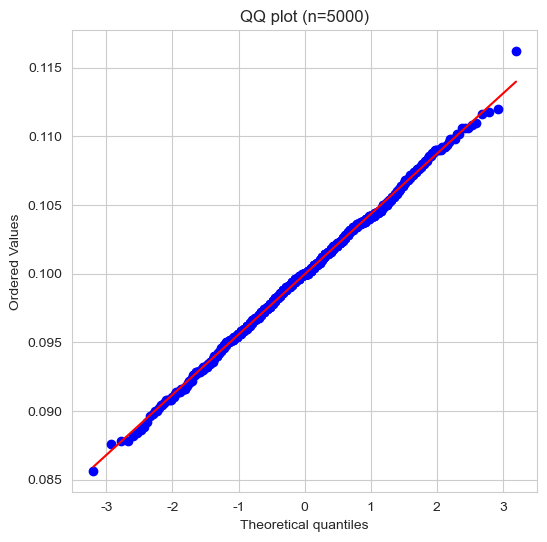

In [4]:
# TODO: 对 n=5000 的样本均值进行 Shapiro-Wilk 正态性检验
# 要求：
#   - 调用 stats.shapiro()
#   - 打印 p-value
#   - 根据 p > 0.05 判断是否接受正态性假设
# ← 请在此处填写代码
stat, p_val = stats.shapiro(means_by_n[5000])
print(f"Shapiro-Wilk test p-value = {p_val:.3f}")
if p_val > 0.05:
    print("p > 0.05，接受正态性假设。")
else:
    print("p ≤ 0.05，拒绝正态性假设。")

# TODO: 绘制 n=5000 的 QQ 图
# 提示：使用 stats.probplot(..., dist="norm", plot=plt)
plt.figure(figsize=(6, 6))
stats.probplot(means_by_n[5000], dist="norm", plot=plt)
plt.title('QQ plot (n=5000)')
plt.show()

#### 【采分点说明】（请认真阅读）
#### 1. LLN 部分（40 分）
####    - 正确生成 Bernoulli 序列（10 分）
####    - 正确计算累积均值（10 分）
####    - 图形完整、标注清晰（20 分）
####
#### 2. CLT 部分（50 分）
####    - 正确模拟不同 n 下的均值分布（20 分）
####    - 直方图与正态密度曲线匹配良好（20 分）
####    - 图形布局合理（10 分）
####
#### 3. 正态性检验（10 分）
####    - 正确执行 Shapiro-Wilk 检验（5 分）
####    - 正确绘制 QQ 图（5 分）
####
#### 4. 代码规范与可读性（扣分项）
####    - 未固定随机种子（-5 分）
####    - 代码无法运行（按错误程度扣分）

#### =============================================
#### 【学生信息】（请填写）
#### =============================================
#### 姓名：葛旸
#### 学号：2014070052
#### GitHub 用户名：student-geyang